# Belajar Penerapan Data Science: Menyelesaikan Permasalahan Human Resource Attrition

- **Name:** Fadhilah Nurrahmayanti
- **Email:** a117xbm150@devacademy.id
- **ID Dicoding:** dilaafn

## Project Overview

Jaya Jaya Maju adalah perusahaan multinasional yang telah beroperasi sejak tahun 2000, dengan lebih dari 1000 karyawan tersebar di berbagai lokasi. Walaupun tergolong perusahaan besar, Jaya Jaya Maju menghadapi tantangan signifikan dalam mengelola karyawannya, yang tercermin dari tingginya tingkat attrition (rasio jumlah karyawan yang keluar terhadap total karyawan keseluruhan). Saat ini, tingkat attrition perusahaan mencapai 16,92%, jauh di atas angka ideal untuk perusahaan dalam industri serupa.

Tingginya tingkat attrition berdampak negatif terhadap produktivitas organisasi, biaya rekrutmen dan pelatihan, serta stabilitas tim kerja. Hal ini mendorong departemen Human Resources (HR) untuk melakukan analisis berbasis data dalam rangka memahami penyebab utama dari attrition serta membangun sistem yang mampu memprediksi potensi karyawan yang berisiko keluar dari perusahaan.


## Business Understanding

### Permasalahan Bisnis

Masalah-masalah bisnis yang melatarbelakangi proyek ini antara lain:
1. Tingginya angka attrition: Tingkat karyawan yang keluar mencapai lebih dari 10%, yang jauh di atas ambang normal. Hal ini menjadi sinyal adanya ketidakpuasan atau ketidakcocokan dalam lingkungan kerja perusahaan.
2. Minimnya pemahaman atas penyebab attrition: Hingga saat ini, perusahaan belum memiliki pemahaman menyeluruh mengenai faktor-faktor apa saja yang paling berpengaruh terhadap keputusan karyawan untuk keluar.
3. Dampak terhadap produktivitas dan biaya operasional: Tingginya angka pergantian karyawan menimbulkan beban biaya rekrutmen dan pelatihan ulang, serta berpotensi menurunkan produktivitas karena hilangnya pengalaman kerja yang sudah terakumulasi.
4. Kebutuhan akan pengambilan keputusan berbasis dashboard: Manajemen HR membutuhkan alat bantu visual seperti dashboard untuk memantau faktor-faktor yang memengaruhi retensi karyawan secara real-time dan informatif.

### Goals

1. Mengidentifikasi variabel-variabel penting yang berkontribusi terhadap kemungkinan seorang karyawan keluar dari perusahaan.
2. Membangun model prediksi berbasis **machine learning** untuk mengklasifikasikan karyawan berisiko tinggi dengan **akurasi dan reliabilitas tinggi**.
3. Mengembangkan dashboard bisnis yang **interaktif dan informatif** untuk membantu HR dalam mengambil keputusan strategis berdasarkan data aktual.

### Solution Statements

1. **Analisis data eksplorasi (EDA):** Memahami pola dan hubungan dalam data, serta mengeksplorasi faktor-faktor yang berkontribusi terhadap attrition.
2. **Preprocessing dan rekayasa fitur:** Membersihkan data, mengonversi fitur kategorikal menjadi numerik, normalisasi data, membagi data, dan mengatasi ketidakseimbangan kelas.
3. **Pengembangan model prediktif:** Menggunakan algoritma machine learning untuk memprediksi karyawan yang berisiko tinggi keluar, dengan pendekatan **supervised machine learning** untuk membangun model klasifikasi attrition menggunakan tiga algoritma: **KNN**, **Random Forest**, dan **XGBoost**.
4. **Pembuatan business dashboard:** Menggunakan Tableau untuk menyajikan informasi kunci terkait tingkat attrition secara visual dan interaktif.
5. **Penyusunan rekomendasi berbasis data:** Memberikan saran strategis untuk mengurangi tingkat attrition.

## Import Library

Proses ini yaitu mengimpor semua library yang diperlukan untuk eksplorasi data dan analisis.


In [1]:
!pip install scikit-learn==1.5.2 -q
!pip install category_encoders -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 45.3 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import category_encoders as ce

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

import joblib

pd.set_option('display.max_columns', None)

## Data Understanding

Langkah ini guna memahami struktur data dan kualitasnya, antara lain:

1. Duplikat: Untuk memastikan tidak ada data yang terduplikasi.
2. Missing Value: Untuk mengidentifikasi data yang hilang.
3. Exploratory Data Analysis (EDA): Fokus pada analisis yang relevan dengan bisnis metric seperti Attrition Rate, Job Satisfaction Index, dan Average Work-Life Balance.


### Data Source and Overview

In [3]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"
df = pd.read_csv(url)

print(f"Dimensi dataset:", df.shape)
df

Dimensi dataset: (1470, 35)


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,3,Female,81,3,3,Manufacturing Director,3,Single,7861,15397,4,Y,Yes,14,3,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,4,Female,50,2,3,Research Director,1,Divorced,13269,21981,5,Y,No,15,3,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,3,Female,79,3,1,Laboratory Technician,4,Married,2515,22955,1,Y,Yes,11,3,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,3,Male,74,3,1,Research Scientist,3,Divorced,3544,8532,9,Y,No,16,3,2,80,1,6,0,3,4,2,0,0


Insight:

* Dataset terdiri dari 1470 baris dan 35 kolom.

Isi dari dataset adalah sebagai berikut:

- **EmployeeId:** Identifikasi karyawan
- **Attrition:** Apakah karyawan meninggalkan perusahaan (0=no, 1=yes)
- **Age:** Usia karyawan
- **BusinessTravel:** Komitmen perjalanan untuk pekerjaan
- **DailyRate:** Gaji harian
- **Department:** Departemen tempat karyawan bekerja
- **DistanceFromHome:** Jarak dari rumah ke tempat kerja (dalam km)
- **Education:** Tingkat pendidikan karyawan (1 hingga 5)
- **EducationField:** Bidang pendidikan
- **EnvironmentSatisfaction:** Kepuasan lingkungan kerja (1-4)
- **Gender:** Jenis kelamin karyawan
- **HourlyRate:** Gaji per jam
- **JobInvolvement:** Tingkat keterlibatan pekerjaan (1-4)
- **JobLevel:** Tingkat jabatan (1 hingga 5)
- **JobRole:** Peran pekerjaan karyawan
- **JobSatisfaction:** Kepuasan kerja (1-4)
- **MaritalStatus:** Status pernikahan
- **MonthlyIncome:** Gaji bulanan
- **MonthlyRate:** Tarif bulanan
- **NumCompaniesWorked:** Jumlah perusahaan yang pernah bekerja di dalamnya
- **Over18:** Apakah karyawan berusia lebih dari 18 tahun
- **OverTime:** Apakah karyawan bekerja lembur
- **PercentSalaryHike:** Persentase kenaikan gaji tahun lalu
- **PerformanceRating:** Penilaian kinerja (1-4)
- **RelationshipSatisfaction:** Kepuasan hubungan kerja (1-4)
- **StandardHours:** Jam kerja standar
- **StockOptionLevel:** Level pilihan saham
- **TotalWorkingYears:** Total tahun bekerja
- **TrainingTimesLastYear:** Jumlah pelatihan yang diikuti tahun lalu
- **WorkLifeBalance:** Keseimbangan kehidupan kerja (1-4)
- **YearsAtCompany:** Lama bekerja di perusahaan
- **YearsInCurrentRole:** Lama bekerja di peran saat ini
- **YearsSinceLastPromotion:** Lama sejak promosi terakhir
- **YearsWithCurrManager:** Lama bekerja dengan manajer saat ini


### Checking Duplicate Data


In [4]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


Insight:

* Tidak ada duplikat dari dataset.

### Checking Missing Value


In [5]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data['Percentage'] = missing_data['Percentage'].round(2)

print("Jumlah dan Persentase Missing Values per Kolom:\n\n", missing_data)

Jumlah dan Persentase Missing Values per Kolom:

                           Missing Values  Percentage
EmployeeId                             0        0.00
Age                                    0        0.00
Attrition                            412       28.03
BusinessTravel                         0        0.00
DailyRate                              0        0.00
Department                             0        0.00
DistanceFromHome                       0        0.00
Education                              0        0.00
EducationField                         0        0.00
EmployeeCount                          0        0.00
EnvironmentSatisfaction                0        0.00
Gender                                 0        0.00
HourlyRate                             0        0.00
JobInvolvement                         0        0.00
JobLevel                               0        0.00
JobRole                                0        0.00
JobSatisfaction                        0        0

Insight:

* Kolom attrition memiliki 412 atau sebanyak 28.03% data kosong atau NaN.
* Data kosong ini perlu ditangani dan karena data yang kosong cukup banyak yaitu 28.03% kosong, baris yang kosong akan dihapus agar tidak menjadi bias.

### Exploratory Data Analysis (EDA)

EDA adalah langkah penting untuk memahami data dan mendapatkan insight yang relevan dengan tujuan bisnis. Fokus utama adalah menganalisis tiga metrik: Attrition Rate, Job Satisfaction Index, dan Average Work-Life Balance.

**Attrition Rate**

Attrition Rate adalah persentase karyawan yang meninggalkan perusahaan dalam periode tertentu. Metrik ini penting untuk memahami tingkat turnover dan mengidentifikasi faktor-faktor yang memengaruhinya.

Rumusnya adalah sebagai berikut:
$$
\text{Attrition Rate} = \frac{\text{Jumlah Karyawan yang Keluar}}{\text{Jumlah Total Karyawan}} \times 100
$$

Penjelasan:
- Jumlah Karyawan yang Keluar: Jumlah karyawan yang diberi label 1 pada kolom Attrition dalam dataset.
- Jumlah Total Karyawan: Total jumlah baris dalam dataset (karyawan aktif maupun keluar).

**Job Satisfaction Index**

Job Satisfaction Index adalah skor rata-rata kepuasan kerja karyawan berdasarkan data survei atau skor yang diberikan pada atribut JobSatisfaction.

Rumusnya adalah sebagai berikut:
$$
\text{Job Satisfaction Index} = \frac{\sum_{i=1}^{n} \text{Job Satisfaction}_i}{n}
$$

Penjelasan:
- $$(\sum_{i=1}^{n} \text{Job Satisfaction}_i)\$$ adalah jumlah dari semua skor JobSatisfaction yang nilainya berkisar dari 1 hingga 4.

- $$(n)$$ adalah total jumlah karyawan yang dinilai.

**Average Work-Life Balance**

Average Work-Life Balance mengukur tingkat keseimbangan antara pekerjaan dan kehidupan pribadi karyawan. Skor ini dinyatakan dalam kolom WorkLifeBalance.

Rumusnya adalah sebagai berikut:
$$
\text{Average Work-Life Balance} = \frac{\sum_{i=1}^{n} \text{Work-Life Balance}_i}{n}
$$

Penjelasan:
- $$(\sum_{i=1}^{n} \text{Work-Life Balance}_i)$$ adalah jumlah dari semua skor pada atribut WorkLifeBalance yang nilainya berkisar dari 1 hingga 4.
- $$(n)$$ adalah total jumlah karyawan yang dinilai.

**Tujuan Dari Ketiga Metrik**
1. Attrition Rate: Membantu memahami tingkat turnover karyawan dan penyebab utamanya, sehingga perusahaan dapat mengurangi kehilangan karyawan yang potensial.
2. Job Satisfaction Index: Menyoroti area operasional atau hierarki pekerjaan yang membutuhkan intervensi untuk meningkatkan kepuasan karyawan.
3. Average Work-Life Balance: Menilai apakah kebijakan perusahaan mendukung keseimbangan kerja-hidup yang memadai, sehingga dapat mencegah burnout dan risiko keluar.

#### Attrition Rate

Attrition Rate adalah metrik utama yang menunjukkan rasio karyawan yang keluar. Analisis yang dilakukan adalah:
1. Menghitung persentase karyawan yang keluar.
2. Menganalisis distribusi attrition berdasarkan faktor usia.
3. Melihat distribusi attrition berdasarkan variabel kerja (departemen, job level, environment satisfaction).



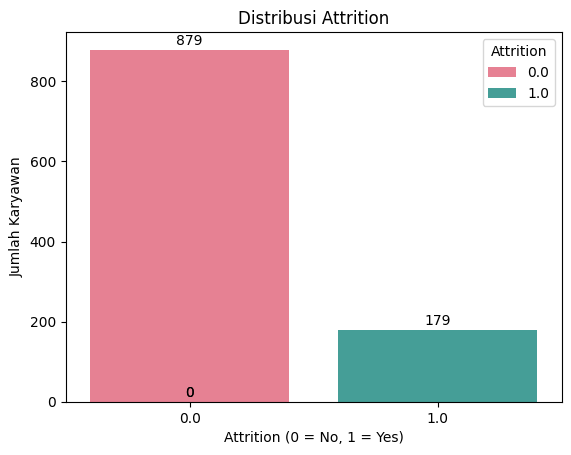


Attrition Rate: 16.92%


In [6]:
ax = sns.countplot(data=df, x='Attrition', hue='Attrition', palette='husl')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 5),
                ha='center', va='bottom')

plt.title("Distribusi Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Jumlah Karyawan")
plt.show()

attrition_rate = df['Attrition'].value_counts(normalize=True)[1] * 100

print(f"\nAttrition Rate: {attrition_rate:.2f}%")

Insight:

* Dari keseluruhan karyawan, ada 179 yang mengalami attrition (keluar dari perusahaan), sementara 879 karyawan tetap.
* Attrition rate secara keseluruhan adalah sekitar 16.92% (179/1058).

#### Attrition Distribution by Age

Usia karyawan dapat memengaruhi tingkat keluar (attrition). Kami akan melihat distribusi usia dan menghitung rata-rata usia berdasarkan status attrition.


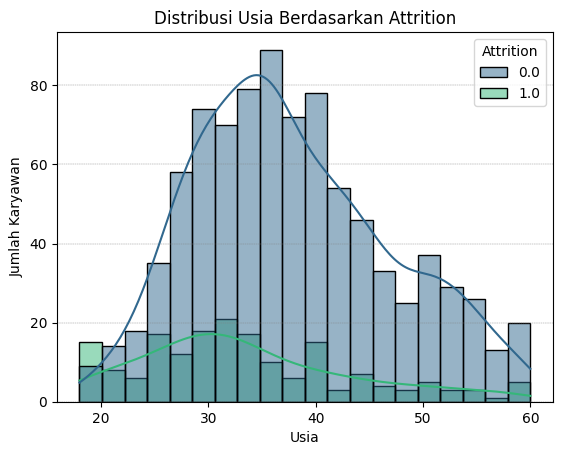

In [7]:
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, bins=20, palette='viridis')

plt.grid(axis='y', linestyle='--', linewidth=0.3, color='gray')
plt.title("Distribusi Usia Berdasarkan Attrition")
plt.xlabel("Usia")
plt.ylabel("Jumlah Karyawan")
plt.show()

Insight:

* Histogram menunjukkan bahwa karyawan yang tidak mengalami attrition (0.0) cenderung lebih muda, dengan puncak distribusi di usia sekitar 30-40 tahun. * Karyawan yang mengalami attrition (1.0) memiliki distribusi usia yang lebih rata, namun dengan puncak di usia yang lebih muda (sekitar 25-35 tahun).
* Karyawan yang lebih muda mungkin lebih cenderung untuk berhenti.

##### Average Age By Attrition

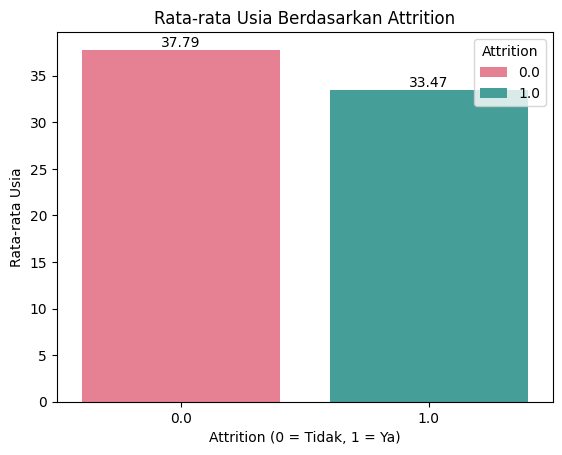

In [8]:
age_by_attrition = df.groupby('Attrition')['Age'].mean()

sns.barplot(x=age_by_attrition.index, y=age_by_attrition.values, hue=age_by_attrition.index, palette="husl")

for i, value in enumerate(age_by_attrition.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.title("Rata-rata Usia Berdasarkan Attrition")
plt.xlabel("Attrition (0 = Tidak, 1 = Ya)")
plt.ylabel("Rata-rata Usia")
plt.show()

Insight:

* Karyawan yang tidak mengalami attrition memiliki rata-rata usia sekitar 37.79 tahun, sedangkan yang mengalami attrition lebih muda dengan rata-rata usia 33.47 tahun.
* Distribusi usia bahwa karyawan yang lebih muda lebih rentan terhadap attrition.

#### Attrition Distribution by Department

Beberapa departemen mungkin memiliki tingkat keluar (attrition) lebih tinggi. Ini dapat membantu memahami area kerja yang memerlukan perhatian lebih.


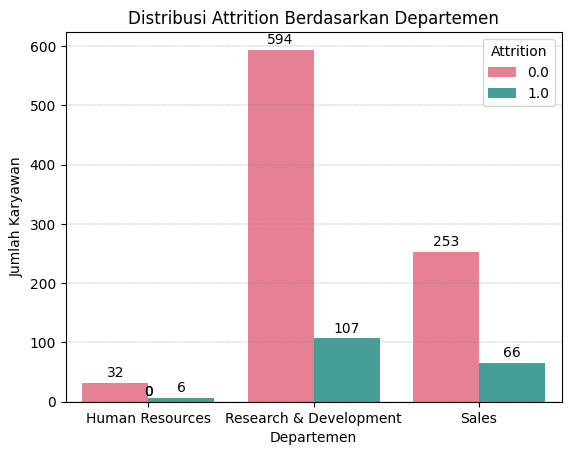

In [9]:
ax = sns.countplot(data=df, x='Department', hue='Attrition', palette='husl')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 5),
                ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', linewidth=0.3, color='gray')
plt.title("Distribusi Attrition Berdasarkan Departemen")
plt.xlabel("Departemen")
plt.ylabel("Jumlah Karyawan")
plt.show()

Insight:

* Departemen Research & Development memiliki jumlah karyawan terbesar (594) yang tidak mengalami attrition, namun juga memiliki jumlah karyawan yang cukup besar (107) yang mengalami attrition.
* Sales juga menunjukkan pola serupa dengan 253 karyawan yang tidak mengalami attrition dan 66 yang mengalami attrition.
* Human Resources, meskipun kecil, menunjukkan bahwa hampir semua karyawan tetap, dengan hanya 6 yang mengalami attrition.

##### Attrition Rate by Department (%)

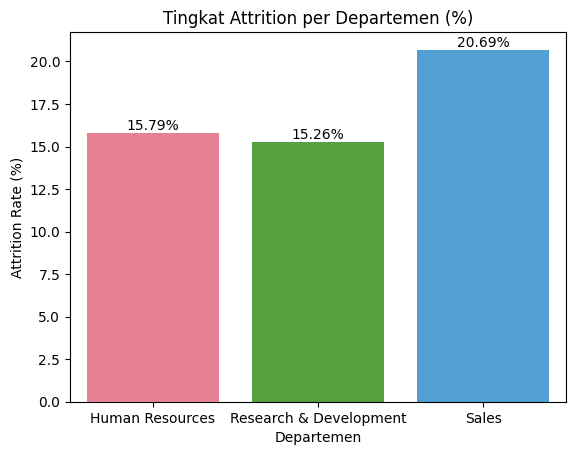

In [10]:
attrition_by_department = df.groupby('Department')['Attrition'].mean() * 100

sns.barplot(x=attrition_by_department.index, y=attrition_by_department.values, hue=attrition_by_department.index, palette="husl")

for i, value in enumerate(attrition_by_department.values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.title("Tingkat Attrition per Departemen (%)")
plt.xlabel("Departemen")
plt.ylabel("Attrition Rate (%)")
plt.show()

Insight:

* Tingkat attrisi atau turnover karyawan paling tinggi terjadi pada departemen Sales, yaitu mencapai 20,69%. Ini artinya, dari seluruh karyawan di departemen Sales, sekitar 20,69% di antaranya telah meninggalkan perusahaan.
* Departemen Research & Development memiliki tingkat attrisi yang paling rendah, yakni 15,26%.
* Departemen dengan tingkat attrisi rendah ke 2 adalah Human Resources, hanya 15,79%.
* Departemen Sales perlu mendapatkan perhatian lebih dari pihak manajemen terkait upaya mengurangi tingkat turnover karyawan.

##### Attrition Rate by Work-Life Balance (%)

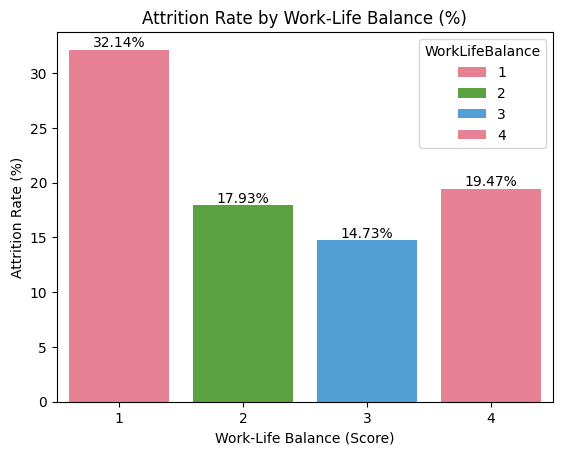

In [11]:
work_life_attrition = df.groupby('WorkLifeBalance')['Attrition'].mean() * 100

sns.barplot(x=work_life_attrition.index, y=work_life_attrition.values, hue=work_life_attrition.index, palette="husl")

for i, value in enumerate(work_life_attrition.values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.title("Attrition Rate by Work-Life Balance (%)")
plt.xlabel("Work-Life Balance (Score)")
plt.ylabel("Attrition Rate (%)")
plt.show()

Insight:

* Karyawan dengan skor work-life balance terendah, yaitu 1, memiliki tingkat attrisi tertinggi, mencapai 32,14%.
* Seiring peningkatan skor work-life balance, tingkat attrisi cenderung menurun, hingga hanya 19,47% pada karyawan dengan skor 4.
* Upaya meningkatkan keseimbangan antara pekerjaan dan kehidupan pribadi karyawan dapat menjadi strategi efektif untuk menurunkan tingkat turnover.

#### Environment Satisfaction vs Attrition

Variabel seperti **Environment Satisfaction** dan **Job Satisfaction** dapat memengaruhi tingkat keluar (attrition).

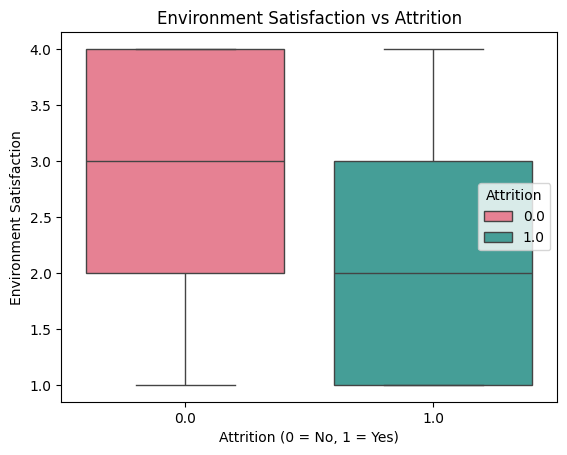

In [12]:
sns.boxplot(data=df, x='Attrition', y='EnvironmentSatisfaction', hue='Attrition', palette='husl')

plt.title("Environment Satisfaction vs Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Environment Satisfaction")
plt.show()

Insight:

* Karyawan yang tidak mengalami attrisi (skor 0,0) cenderung memiliki environment satisfication score kerja yang jauh lebih tinggi dibandingkan mereka yang mengalami attrisi (skor 1,0).
* Adanya korelasi antara lingkungan kerja yang kurang memuaskan dengan kecenderungan karyawan untuk meninggalkan perusahaan.

##### Job Satisfaction vs Attrition

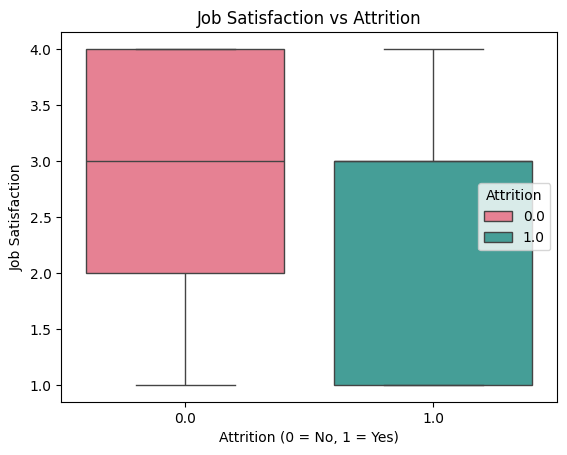

In [13]:
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', hue='Attrition', palette='husl')

plt.title("Job Satisfaction vs Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Job Satisfaction")
plt.show()

Insight:

* Serupa dengan pola pada environment satisfication, visualisasi di atas menunjukkan bahwa karyawan yang tidak mengalami attrisi (skor 0,0) memiliki job satisfication score yang jauh lebih tinggi dibandingkan mereka yang mengalami attrisi (skor 1,0).
* Upaya meningkatkan job satisfication score karyawan juga dapat menjadi strategi penting untuk menurunkan tingkat turnover.

#### Job Satisfaction Index

Indeks ini mencerminkan rata-rata kepuasan kerja karyawan. Analisis dilakukan untuk:
1. Menghitung rata-rata indeks kepuasan kerja.
2. Melihat distribusi kepuasan kerja berdasarkan departemen dan level pekerjaan.



##### Average Job Satisfaction

In [14]:
job_satisfaction_index = df['JobSatisfaction'].mean()

print(f"Rata-rata Job Satisfaction Index: {job_satisfaction_index:.2f}")

Rata-rata Job Satisfaction Index: 2.73


Insight:

* Dengan skor rata-rata 2.73 dari 4, Job satisfication memiliki rata-rata skor yang kurang baik sehingga manajemen perusahaan perlu untuk meningkatkan skor tersebut karena skor job satisfication berkorelasi dengan tingkat atrisi.

#### Job Distribution by Department

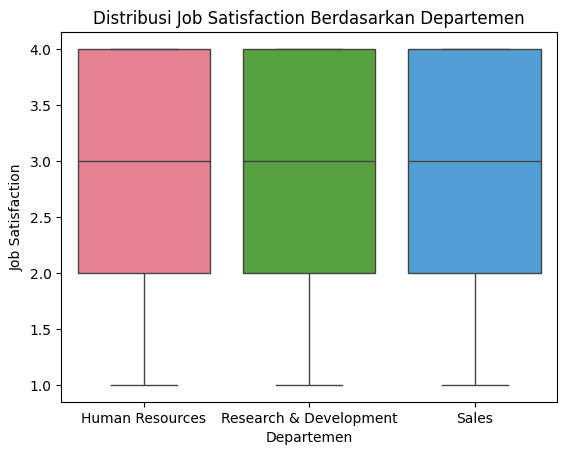

In [15]:
sns.boxplot(data=df, x='Department', y='JobSatisfaction', hue='Department', palette='husl')

plt.title("Distribusi Job Satisfaction Berdasarkan Departemen")
plt.xlabel("Departemen")
plt.ylabel("Job Satisfaction")
plt.show()

Insight:

* Ketiga departemen memiliki job satisfication score yang cenderung sama.

#### Distribution by Job Level

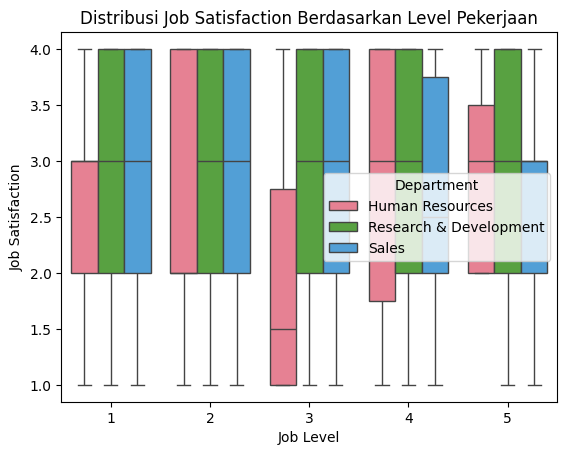

In [16]:
sns.boxplot(data=df, x='JobLevel', y='JobSatisfaction', hue='Department', palette='husl')

plt.title("Distribusi Job Satisfaction Berdasarkan Level Pekerjaan")
plt.xlabel("Job Level")
plt.ylabel("Job Satisfaction")
plt.show()

Insight:

* Karyawan dengan level pekerjaan yang lebih tinggi cenderung memiliki skor kepuasan kerja yang lebih rendah.
* Karyawan dengan level pekerjaan 3 hingga 5 memiliki skor kepuasan kerja yang lebih rendah dibandingkan mereka yang berada di level 1 dan 2.

#### Work-Life Balance
Keseimbangan kerja-hidup yang buruk dapat menyebabkan kelelahan karyawan dan meningkatkan risiko keluar. Analisis dilakukan untuk:
1. Distribusi Work-Life Balance.
2. Hubungan Work-Life Balance dengan Attrition.


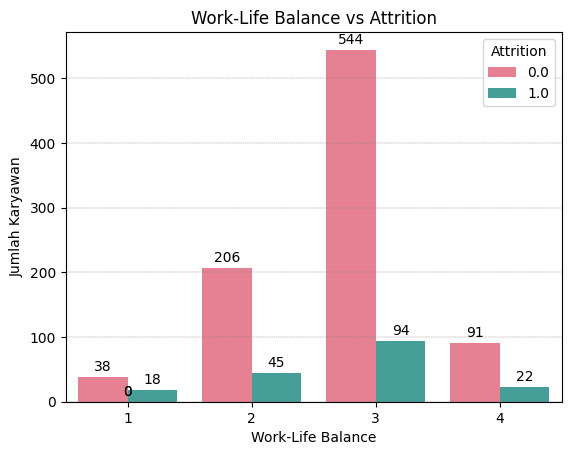

In [17]:
ax = sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette='husl')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 5),
                ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', linewidth=0.3, color='gray')
plt.title("Work-Life Balance vs Attrition")
plt.xlabel("Work-Life Balance")
plt.ylabel("Jumlah Karyawan")
plt.show()

Insight:

* Terlihat semakin baik work-life balance score, semakin rendah tingkat attrisi karyawan.
* Karyawan dengan skor keseimbangan 4 memiliki tingkat attrisi terendah.

## Data Preparation

#### Handling Missing Values

Kolom Attrition adalah target variabel. Karena memiliki 28% nilai kosong, kita tidak bisa mengisi (imputasi) nilai ini tanpa risiko menambahkan bias signifikan. Dengan menghapus baris, kita memastikan hanya data lengkap yang digunakan.

In [18]:
df = df.dropna(subset=['Attrition'])

print("Ukuran dataset setelah menghapus missing values:", df.shape)

Ukuran dataset setelah menghapus missing values: (1058, 35)


Insight:

* Dataset asli berukuran (1470, 35). Setelah menghapus 412 baris dengan nilai kosong pada kolom Attrition, ukuran dataset menjadi (1058, 35).
* Data ini sekarang bebas dari missing values.

#### Converting Categorical Variables and Normalizing Features

Teknik Preprocessing yang digunakan:

1. Binary Encoding: Untuk mengubah variabel biner menjadi format numerik yang dapat digunakan oleh model ML tanpa menambahkan banyak dimensi seperti one-hot encoding untuk variabel biner. BinaryEncoder dari category_encoders mengubah satu kolom biner menjadi beberapa kolom biner yang mewakili nilai dalam bentuk biner.

2. One-Hot Encoding: Untuk mengubah variabel kategorikal menjadi representasi numerik yang tidak menyiratkan urutan atau hierarki antar kategori. OneHotEncoder dari category_encoders digunakan dengan use_cat_names=True untuk memberikan nama kolom yang deskriptif dan mudah dibaca.

3. Standard Scaling: Untuk normalisasi fitur numerik, memastikan semua fitur berkontribusi secara setara dalam training model tanpa satu fitur mendominasi karena skala yang berbeda. StandardScaler mengubah data sehingga nilai rata-rata menjadi 0 dan standar deviasi menjadi 1.

In [19]:
binary_columns = ['Gender', 'Over18', 'OverTime']
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus',
                       'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
                       'RelationshipSatisfaction', 'WorkLifeBalance', 'PerformanceRating', 'JobLevel', 'StockOptionLevel']
numeric_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
                   'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                   'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

binary_transformer = Pipeline(steps=[
    ('binary', ce.BinaryEncoder())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', ce.OneHotEncoder(use_cat_names=True))
])
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('bin', binary_transformer, binary_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ])

X = df.drop(columns=['Attrition', 'EmployeeId'])
y = df['Attrition']

X = preprocessor.fit_transform(X)

feature_names = preprocessor.get_feature_names_out()

df_transformed = pd.DataFrame(X, columns=feature_names)

joblib.dump(preprocessor, 'preprocessor_model.joblib')

print("Ukuran dataset setelah transformasi:", df_transformed.shape)

Ukuran dataset setelah transformasi: (1058, 52)


Insight:

* Dataset sekarang memiliki lebih banyak kolom yaitu 52 kolom setelah preprocessing di atas.
* Semua data kategorikal termasuk yang biner telah diubah menjadi bentuk numerik yang sesuai untuk input model ML.\
* Fitur numerik telah discaling, yang membantu dalam pembelajaran model dengan algoritma yang sensitif terhadap skala data seperti SVM, k-NN, atau neural networks.
* One-hot encoding untuk variabel kategorikal menghasilkan kolom baru, tetapi dengan manajemen yang baik untuk menghindari curse of dimensionality.

#### Data Split and Data Oversampling with SMOTE

Sebelum melakukan oversampling, data dibagi menjadi set pelatihan (train) dan set pengujian (test) dengan perbandingan 80:20 menggunakan train_test_split. Ini dilakukan sebelum SMOTE untuk menghindari data leakage atau kebocoran data. Test set harus tetap mencerminkan distribusi asli data.

Variabel target Attrition tidak seimbang, di mana jumlah Attrition=0 lebih banyak dibandingkan Attrition=1. Oversampling dengan SMOTE menciptakan sampel sintetis untuk kelas minoritas, sehingga meningkatkan performa model. Oversampling menggunakan Synthetic Minority Oversampling Technique (SMOTE). Hanya data pelatihan yang di-resample dengan SMOTE untuk membuat dataset yang lebih seimbang tanpa mempengaruhi data uji.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribution of target before SMOTE (Training set):")
print(y_train.value_counts())

print("\nDistribution of target after SMOTE (Training set):")
print(pd.Series(y_train_resampled).value_counts())

print("\nSize of training data after SMOTE:", X_train_resampled.shape)
print("Size of test data (unchanged):", X_test.shape)

Distribution of target before SMOTE (Training set):
Attrition
0.0    706
1.0    140
Name: count, dtype: int64

Distribution of target after SMOTE (Training set):
Attrition
0.0    706
1.0    706
Name: count, dtype: int64

Size of training data after SMOTE: (1412, 52)
Size of test data (unchanged): (212, 52)


Insight:

* Sekarang memiliki distribusi kelas yang lebih seimbang, yang dapat membantu model untuk belajar dari kedua kelas dengan lebih adil.
* Tetapi data test tetap memiliki distribusi asli, memberikan evaluasi yang realistis tentang performa model pada data asli.

## Modelling

Project ini akan menggunakan tiga algoritma berikut:

1. **K-Nearest Neighbors (KNN):**
   - Algoritma berbasis tetangga terdekat yang sederhana dan efektif.
   - Cocok untuk dataset kecil hingga menengah dengan distribusi data yang jelas.
   - Menggunakan metrik jarak seperti Euclidean untuk menentukan kedekatan antar data.

2. **Random Forest (RF):**
   - Algoritma ensemble berbasis pohon keputusan yang kuat terhadap outlier dan non-linearitas.
   - Mengurangi overfitting dibandingkan pohon keputusan tunggal.

3. **XGBoost (XGB):**
   - Algoritma boosting berbasis gradien yang efisien.
   - Memiliki kemampuan bawaan untuk menangani ketidakseimbangan data dengan pengaturan **scale_pos_weight**.
   - Populer dalam industri karena kecepatan dan performa tinggi pada dataset dengan dimensi besar.

### Model KNN

**Penjelasan Hyperparameter KNN**:
- **`n_neighbors`**: Jumlah tetangga terdekat yang dipertimbangkan untuk menentukan kelas. Semakin kecil nilai `n_neighbors`, model lebih sensitif terhadap noise (overfitting). Semakin besar nilai `n_neighbors`, model lebih sederhana dan lebih stabil, tetapi berisiko underfitting.
- **`weights`**: Metode penghitungan bobot untuk tetangga. `uniform` memberi bobot yang sama untuk semua tetangga, sementara `distance` memberikan bobot lebih pada tetangga yang lebih dekat, membuat model lebih responsif terhadap data lokal.
- **`metric`**: Metrik yang digunakan untuk menghitung jarak antar titik data. `euclidean` adalah metrik standar, sementara `manhattan` lebih sesuai untuk data diskrit atau data dengan dimensi besar, dan `chebyshev` mengukur jarak dengan mempertimbangkan dimensi yang paling dominan.

In [21]:
knn_model = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}

grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train_resampled, y_train_resampled)

print("Best parameters for KNN:", grid_search_knn.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Classification Report - KNN
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83       173
         1.0       0.29      0.31      0.30        39

    accuracy                           0.73       212
   macro avg       0.56      0.57      0.57       212
weighted avg       0.74      0.73      0.73       212



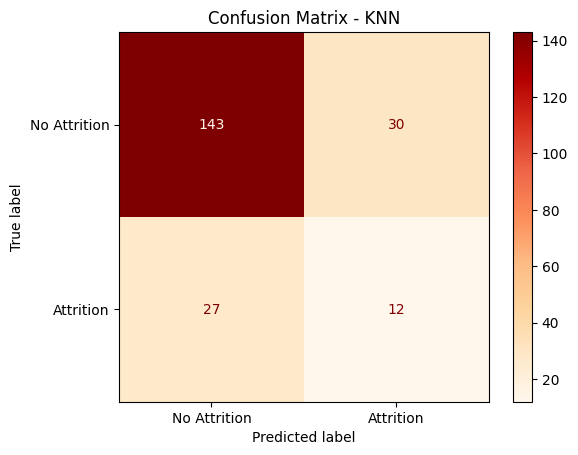

['best_knn_model.joblib']

In [22]:
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

print("Classification Report - KNN")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['No Attrition', 'Attrition'])
disp_knn.plot(cmap='OrRd')

plt.title("Confusion Matrix - KNN")
plt.show()

joblib.dump(best_knn_model, 'best_knn_model.joblib')

Insight:

- **True Positives (TP):** 143
- **False Positives (FP):** 30
- **False Negatives (FN):** 27
- **True Negatives (TN):** 12

### Model Random Forest

**Penjelasan Hyperparameter Random Forest**:
- **`n_estimators`**: Jumlah pohon (trees) yang digunakan dalam forest. Semakin banyak pohon, model akan lebih stabil, namun juga membutuhkan lebih banyak waktu untuk pelatihan.
- **`max_depth`**: Kedalaman maksimum dari setiap pohon. Pohon yang lebih dalam dapat menyebabkan overfitting, jadi semakin kecil nilai `max_depth`, model akan lebih sederhana.
- **`min_samples_split`**: Minimum jumlah sampel yang diperlukan untuk membagi node internal. Nilai yang lebih besar akan membantu mengurangi overfitting dengan membuat pohon lebih umum.
- **`min_samples_leaf`**: Minimum jumlah sampel yang diperlukan untuk membentuk sebuah leaf node. Nilai yang lebih besar akan membuat model lebih sederhana dan mengurangi overfitting.

In [23]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       173
         1.0       0.73      0.28      0.41        39

    accuracy                           0.85       212
   macro avg       0.80      0.63      0.66       212
weighted avg       0.83      0.85      0.82       212



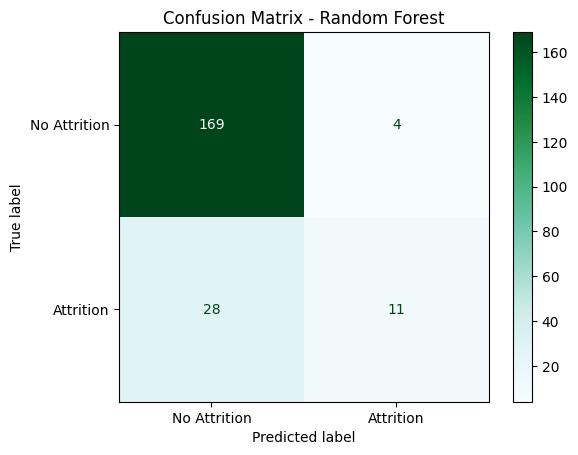

['best_rf_model.joblib']

In [24]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Attrition', 'Attrition'])
disp_rf.plot(cmap='BuGn')

plt.title("Confusion Matrix - Random Forest")
plt.show()

joblib.dump(best_rf_model, 'best_rf_model.joblib')

Insight:

- **True Positives (TP):** 169
- **False Positives (FP):** 4
- **False Negatives (FN):** 28  
- **True Negatives (TN):** 11

### Model XGBoost

**Penjelasan hyperparameter XGBoost**:
- **`n_estimators`**: Jumlah boosting rounds (atau trees) yang akan dilatih. Semakin banyak pohon, model mungkin akan lebih akurat, tetapi juga bisa mengalami overfitting dan pelatihan yang lebih lama.
- **`max_depth`**: Kedalaman maksimum dari pohon yang dibuat dalam boosting. Semakin dalam pohon, semakin besar risiko overfitting, jadi nilai ini sering kali disesuaikan agar tidak terlalu dalam.
- **`subsample`**: Prosentase data yang digunakan untuk setiap boosting round. Nilai yang lebih rendah dapat membantu mengurangi overfitting dengan memperkenalkan elemen keacakan pada model.
- **`colsample_bytree`**: Fraksi fitur yang digunakan untuk setiap pohon. Mengurangi nilai ini dapat membantu menghindari overfitting dan membuat model lebih robust.

In [25]:
xgb_model = XGBClassifier(random_state=42)

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'max_depth': 10, 'n_estimators': 50, 'subsample': 1.0}


Classification Report - XGBoost
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       173
         1.0       0.67      0.41      0.51        39

    accuracy                           0.85       212
   macro avg       0.77      0.68      0.71       212
weighted avg       0.84      0.85      0.84       212



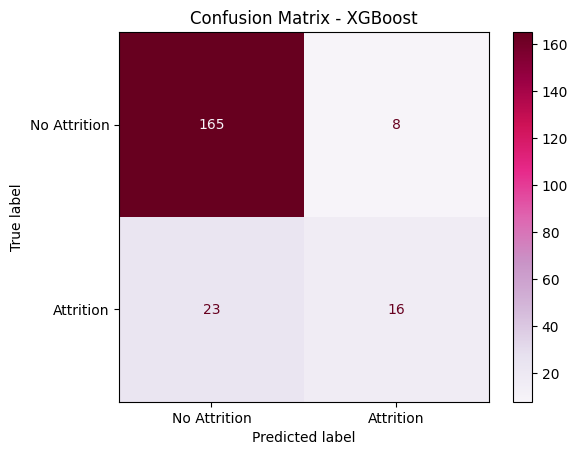

['best_xgb_model.joblib']

In [26]:
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No Attrition', 'Attrition'])
disp_xgb.plot(cmap='PuRd')

plt.title("Confusion Matrix - XGBoost")
plt.show()

joblib.dump(best_xgb_model, 'best_xgb_model.joblib')

Insight:

- **True Positives (TP):** 165
- **False Positives (FP):** 8
- **False Negatives (FN):** 23  
- **True Negatives (TN):** 16

## Evaluation

Evaluasi dilakukan menggunakan metrik berikut:

1. **Accuracy**: Akurasi adalah persentase dari semua prediksi yang benar (baik positif maupun negatif) dibandingkan dengan total prediksi yang dibuat. Ini memberikan gambaran umum performa model tetapi bisa menyesatkan jika dataset tidak seimbang.

   $$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

2. **Precision**: Presisi mengukur seberapa akurat model dalam mengidentifikasi kasus positif. Ini menunjukkan proporsi dari kasus yang diprediksi positif yang sebenarnya positif.

   $$ \text{Precision} = \frac{TP}{TP + FP} $$

3. **Recall**: Recall mengukur kemampuan model untuk menemukan semua kasus positif yang ada dalam dataset. Ini adalah proporsi dari kasus positif yang benar-benar diidentifikasi oleh model.

   $$ \text{Recall} = \frac{TP}{TP + FN} $$

4. **F1-Score**: F1-Score adalah rata-rata harmonis dari presisi dan recall, memberikan skor tunggal yang mencerminkan keseimbangan antara keduanya. Berguna ketika ingin melihat performa model di kedua metrik tersebut.

   $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

---

Berikut hasil perhitungan evaluasi model **Random Forest**, **XGBoost**, dan **KNN** berdasarkan metrik yang diberikan.  


### **1. Evaluasi Model KNN**
- **True Positives (TP)** = 143  
- **False Positives (FP)** = 30  
- **False Negatives (FN)** = 27  
- **True Negatives (TN)** = 12  

#### **Accuracy**:  
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{143 + 12}{143 + 12 + 30 + 27} = \frac{155}{212} = 0.7311 \quad \text{(73.11%)}
$$

#### **Precision**:  
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{143}{143 + 30} = \frac{143}{173} = 0.8260 \quad \text{(82.60%)}
$$

#### **Recall**:  
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{143}{143 + 27} = \frac{143}{170} = 0.8412 \quad \text{(84.12%)}
$$

#### **F1-Score**:  
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.8260 \times 0.8412}{0.8260 + 0.8412} = 0.8335 \quad \text{(83.35%)}
$$

---

### **2. Evaluasi Model Random Forest**
- **True Positives (TP)** = 169  
- **False Positives (FP)** = 4  
- **False Negatives (FN)** = 28  
- **True Negatives (TN)** = 11  

#### **Accuracy**:  
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{169 + 11}{169 + 11 + 4 + 28} = \frac{180}{212} = 0.8491 \quad \text{(84.91%)}
$$

#### **Precision**:  
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{169}{169 + 4} = \frac{169}{173} = 0.9769 \quad \text{(97.69%)}
$$

#### **Recall**:  
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{169}{169 + 28} = \frac{169}{197} = 0.8584 \quad \text{(85.84%)}
$$

#### **F1-Score**:  
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.9769 \times 0.8584}{0.9769 + 0.8584} = 0.9136 \quad \text{(91.36%)}
$$

---

### **3. Evaluasi Model XGBoost**
- **True Positives (TP)** = 165  
- **False Positives (FP)** = 8  
- **False Negatives (FN)** = 23  
- **True Negatives (TN)** = 16  

#### **Accuracy**:  
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{165 + 16}{165 + 16 + 8 + 23} = \frac{181}{212} = 0.8547 \quad \text{(85.47%)}
$$

#### **Precision**:  
$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{165}{165 + 8} = \frac{165}{173} = 0.9538 \quad \text{(95.38%)}
$$

#### **Recall**:  
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{165}{165 + 23} = \frac{165}{188} = 0.8777 \quad \text{(87.77%)}
$$

#### **F1-Score**:  
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.9538 \times 0.8777}{0.9538 + 0.8777} = 0.9142 \quad \text{(91.42%)}
$$


### Comparasions

| **Metrik**      | **KNN**  | **Random Forest** | **XGBoost**   |
|------------------|----------|-------------------|---------------|
| **Accuracy**     | 73.11%   | 84.91%            | 85.47%        |
| **Precision**    | 82.60%   | 97.69%            | 95.38%        |
| **Recall**       | 84.12%   | 85.84%            | 87.77%        |
| **F1-Score**     | 83.35%   | 91.36%            | 91.42%        |

In [27]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = [73.11, 82.60, 84.12, 83.35]
rf_scores = [84.91, 97.69, 85.84, 91.36]
xgb_scores = [85.47, 95.38, 87.77, 91.42]

x = np.arange(len(metrics))
width = 0.25

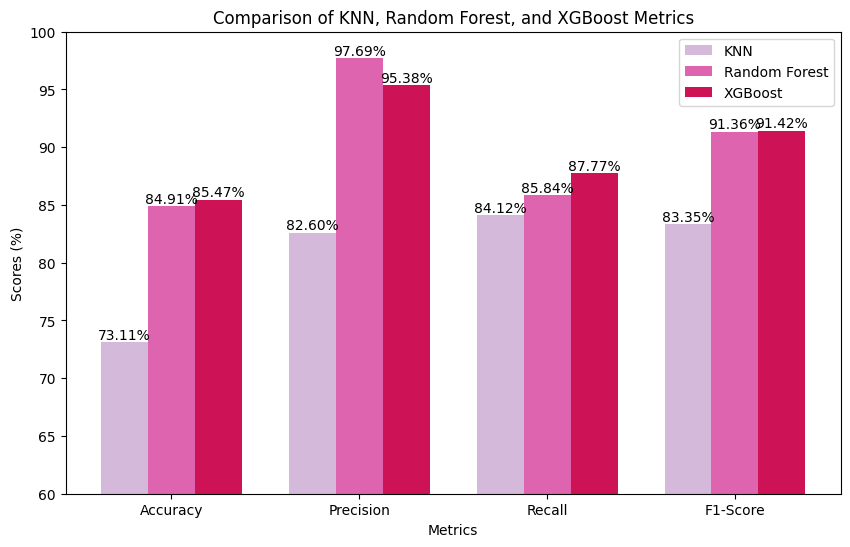

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

color_knn = sns.color_palette('PuRd', 3)[0]
color_rf = sns.color_palette('PuRd', 3)[1]
color_xgb = sns.color_palette('PuRd', 3)[2]

bar1 = ax.bar(x - width, knn_scores, width, label='KNN', color=sns.color_palette('PuRd', 3)[0])
bar2 = ax.bar(x, rf_scores, width, label='Random Forest', color=sns.color_palette('PuRd', 3)[1])
bar3 = ax.bar(x + width, xgb_scores, width, label='XGBoost', color=sns.color_palette('PuRd', 3)[2])

for i, v in enumerate(knn_scores):
    ax.text(x[i] - width, v, f'{v:.2f}%', ha='center', va='bottom')
for i, v in enumerate(rf_scores):
    ax.text(x[i], v, f'{v:.2f}%', ha='center', va='bottom')
for i, v in enumerate(xgb_scores):
    ax.text(x[i] + width, v, f'{v:.2f}%', ha='center', va='bottom')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of KNN, Random Forest, and XGBoost Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.ylim(60, 100)
plt.show()

Insight:

Hasil evaluasi menunjukkan bahwa **XGBoost** memiliki performa terbaik dengan nilai **F1-Score** tertinggi sebesar 91.42%, diikuti oleh **Random Forest** dengan nilai **F1-Score** sebesar 91.36%.

- **Random Forest** menunjukkan nilai **precision** tertinggi (97.69%), yang berarti model ini sangat andal dalam memprediksi kelas positif dengan akurasi tinggi. Namun, nilai **recall** sebesar 85.84% menunjukkan bahwa ada beberapa kelas positif yang tidak terdeteksi.

- **XGBoost** memiliki keseimbangan terbaik antara **precision** (95.38%) dan **recall** (87.77%), menghasilkan nilai **F1-Score** yang sedikit lebih tinggi daripada **Random Forest**.

- **KNN** memberikan performa yang kompetitif dengan nilai **F1-Score** sebesar 83.35%. Namun, nilai **accuracy** (73.11%) dan **precision** (82.60%) lebih rendah dibandingkan model lainnya, menunjukkan bahwa model ini cenderung memberikan lebih banyak prediksi positif yang salah (false positives).

### Conclusion

Berdasarkan hasil evaluasi:

1. **XGBoost** adalah model terbaik dalam proyek ini, dengan **F1-Score** tertinggi dan keseimbangan yang baik antara **precision** dan **recall**. Model ini sangat cocok untuk mendeteksi kasus positif sambil meminimalkan prediksi positif yang salah, menjadikannya pilihan utama untuk implementasi.

2. **Random Forest** memberikan performa hampir setara dengan XGBoost, dengan nilai **precision** yang lebih tinggi, membuatnya andal dalam memastikan akurasi prediksi positif. Model ini juga dapat digunakan sebagai alternatif utama jika diperlukan.

3. **KNN** menunjukkan performa yang layak tetapi berada di bawah XGBoost dan Random Forest. Model ini dapat dipertimbangkan untuk digunakan sebagai baseline model atau jika efisiensi komputasi menjadi prioritas utama.

### **Rekomendasi**
Dalam konteks bisnis, mendeteksi kelas positif dengan akurasi tinggi (high precision) dan memastikan sebanyak mungkin kasus positif terdeteksi (high recall) sangat penting. Oleh karena itu, **XGBoost** direkomendasikan sebagai model utama untuk diimplementasikan dalam mendeteksi karyawan yang rentan keluar. **Random Forest** dapat digunakan sebagai model cadangan dengan performa yang hampir sama baiknya.